# Projet 3 : Boston Housing
Après m'ètre concentrer sur le **Feature Engineering** (nettoyage, encodage, split, train, évaluation), ce troisième projet ouvrira la  porte de la régression linéaire (et multiple). Je précise que j'ai déja un bagage solide en régression linéaire, suite à ma licence de Maths (Statistiques et Analyse/Algèbre linéaire).
Je profite alors de ce troisième projet pour confirmer mes acquis, et m'assurer que ce que j'ai appris correspond bien à ce qui se fait dans l'IA/ML/DL.

On attaque alors le projet Boston Housing. Il s'agira de prédire le prix des maisons en fonction de plusieurs caractéristiques (nombre de pièces, taux de criminalité, distance au centre-ville, etc.), sur un dataset classique : load_boston
On conserve le même environnement que pour le projet 1 et 2.

## I. Importation des modules nécessaires  
On commence par importer les librairies et charger les données.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [6]:
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [50]:
df.info()
(df.describe()).T
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

> On sort les infos intéressantes. On observe qu'aucune donnée est manquante (pas de NaN). seulement deux catégories non numériques (qualitatives)

## II. Visualisation et corrélations 

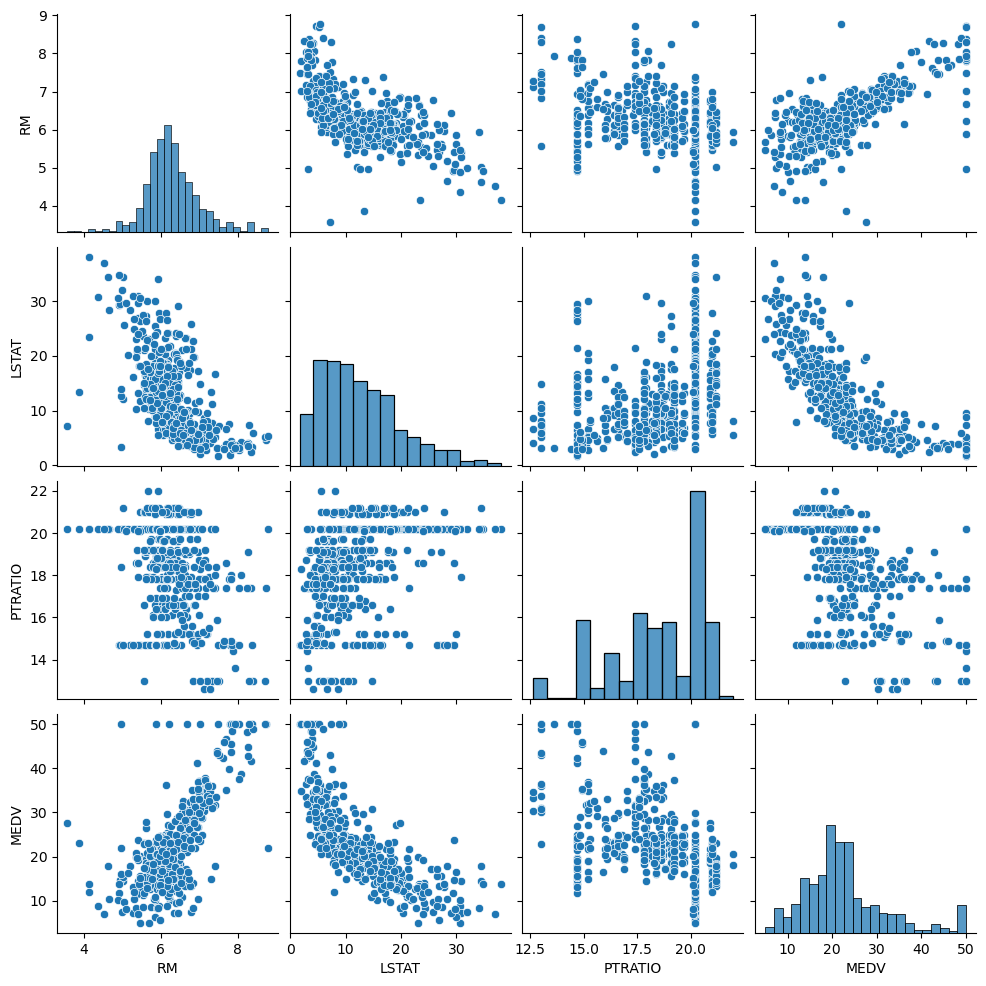

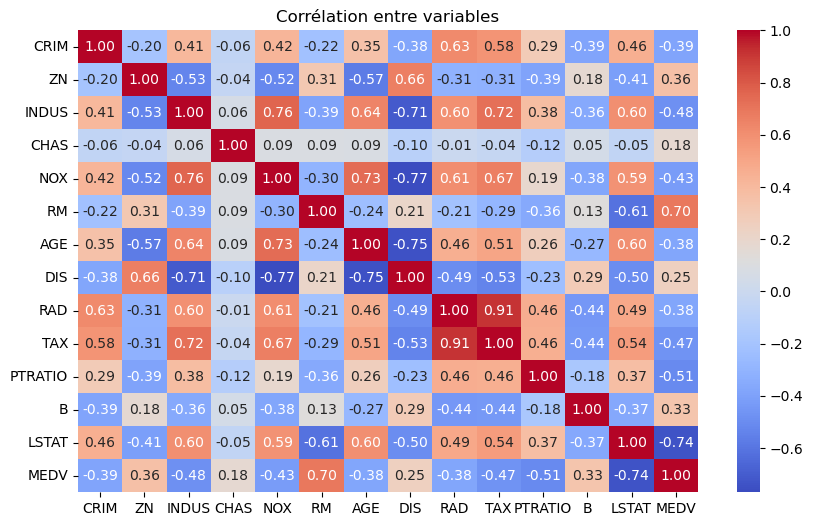

In [58]:
sns.pairplot(df[['RM', 'LSTAT', 'PTRATIO', 'MEDV']])
plt.show()
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre variables")
plt.show()

> Ici il s'agit d'observer les potentiels corrélations entre variables, ainsi que les potentiels variables qui influencent le plus le prix (MEDV)

> On observe une corrélation négative entre les variables LSTAT et RM, c'est à dire qu'à mesure que plus la proportion d'habitant de classe basse est grande, plus le nombre de pièces moyen diminue.  
> On remarque également que le **nombre de pièces moyen** est la variable la plus influente **positivement**, ce qui est tout a fait logique. En revanche, plus la proportion de la population est de **couleure noire**, plus le prix médian **baisse**. 

## III. Préparation des données

In [66]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


> **Standardisation** des données nécessaire pour les modèles linéaires, pour accorder le **même poids** à chaque variable.

## IV. Entraînement du modèle

In [72]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## V. Evaluation du modèle

In [76]:
y_pred = model.predict(X_test_scaled)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


MAE: 3.189091965887846
RMSE: 4.928602182665334
R²: 0.6687594935356322


>MAE = erreur moyenne en valeur absolue

>RMSE = erreur quadratique moyenne

>R² = proportion de variance expliquée (plus c’est proche de 1, mieux c’est)

C:\Users\Toni\AppData\Local\Temp\ipykernel_12964\1654022079.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')


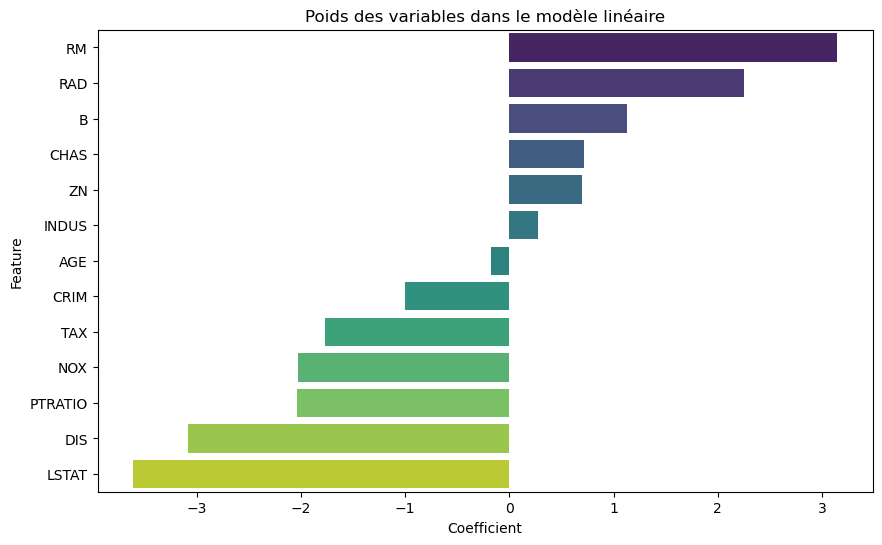

In [79]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=coef_df, x='Coefficient', y='Feature', palette='viridis')
plt.title("Poids des variables dans le modèle linéaire")
plt.show()